# Problema

Predecir el coste del seguro

## Instrucciones

 Utilizar el dataset (insurance.csv) para entrenar un modelo de regresión capaz de predecir el valor del seguro en función de las características del cliente. Realizar limpieza, preprocesado modelado y testeo del modelo aportando conclusiones de todos estos pasos.

# El set de datos

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance



In [ ]:
# imports
import pandas as pd
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta = '/content/drive/MyDrive/insurance.csv'
data = pd.read_csv(ruta)

In [ ]:
print(data.shape)
data.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Verifica si hay valores nulos en el DataFrame
valores_nulos = data.isnull().sum()

print("Valores nulos en el DataFrame:")
print(valores_nulos)

Valores nulos en el DataFrame:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
# Verificar si hay filas duplicadas en el DataFrame
filas_duplicadas = data.duplicated().sum()

if filas_duplicadas > 0:
    print("Se encontraron filas duplicadas en el DataFrame.")
    print(f"Número de filas duplicadas: {filas_duplicadas}")
else:
    print("No se encontraron filas duplicadas en el DataFrame.")

Se encontraron filas duplicadas en el DataFrame.
Número de filas duplicadas: 1


El estudio nos muestra que hay una fila duplicada y como eso no nos interesa, la eliminaremos.

In [ ]:
datos = data.drop_duplicates()

# Objetivo

Generar un model de regresión capaz de predecir el valor del seguro en base a las características del cliente.

* Aplicar las técnicas oportunas de procesamiento de datos

* Valorar diferentes modelos de regresión

* Comparación entre modelos

* Ensemble

* Métricas

* Conclusiones finales

# PREPROCESAMIENTO DATOS


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


In [ ]:
# Manejo de valores faltantes
imputer = SimpleImputer(strategy='mean')
data[['bmi']] = imputer.fit_transform(data[['bmi']])

In [ ]:
# Codificación de variables categóricas
encoder = OneHotEncoder()
encoded_data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'])

In [ ]:
# Escalado de características
scaler = StandardScaler()
scaled_features = scaler.fit_transform(encoded_data.drop('charges', axis=1))


In [ ]:
# Dividir el dataset en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(scaled_features, data['charges'], test_size=0.2, random_state=42)

# MODELADO

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Inicializar modelos
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor()
forest_model = RandomForestRegressor()

# Entrenar modelos
linear_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)


RandomForestRegressor()

# COMPARACIÓN ENTRE MODELOS

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Realizar predicciones
linear_pred = linear_model.predict(X_test)
tree_pred = tree_model.predict(X_test)
forest_pred = forest_model.predict(X_test)

# Calcular métricas
linear_mse = mean_squared_error(y_test, linear_pred)
tree_mse = mean_squared_error(y_test, tree_pred)
forest_mse = mean_squared_error(y_test, forest_pred)

linear_r2 = r2_score(y_test, linear_pred)
tree_r2 = r2_score(y_test, tree_pred)
forest_r2 = r2_score(y_test, forest_pred)

print("Linear Regression MSE:", linear_mse)
print("Decision Tree MSE:", tree_mse)
print("Random Forest MSE:", forest_mse)

print("Linear Regression R^2:", linear_r2)
print("Decision Tree R^2:", tree_r2)
print("Random Forest R^2:", forest_r2)


Linear Regression MSE: 33596915.851361476
Decision Tree MSE: 39603673.9794718
Random Forest MSE: 21498752.421545137
Linear Regression R^2: 0.7835929767120722
Decision Tree R^2: 0.7449017869651942
Random Forest R^2: 0.8615205920527322



Los resultados muestran que el modelo de Random Forest tiene el menor error cuadrático medio (MSE), lo que indica que es el modelo que mejor se ajusta a los datos de prueba en comparación con los otros modelos. Además, el coeficiente de determinación (R^2) más alto también se observa en el modelo de Random Forest, lo que sugiere que este modelo explica una mayor proporción de la variabilidad en los datos de prueba en comparación con los otros modelos.

Basándonos en estos resultados, podríamos concluir que el modelo de Random Forest es el más adecuado para predecir el costo del seguro médico en base a las características del cliente en este conjunto de datos.

# ENSEMBLE

In [ ]:
ensemble_pred = (linear_pred + tree_pred + forest_pred) / 3
ensemble_mse = mean_squared_error(y_test, ensemble_pred)
ensemble_r2 = r2_score(y_test, ensemble_pred)

print("Ensemble MSE:", ensemble_mse)
print("Ensemble R^2:", ensemble_r2)


Ensemble MSE: 23270251.933525357
Ensemble R^2: 0.8501098739427805


En este caso, un R^2 de aproximadamente 0.850 sugiere que el modelo de ensemble explica alrededor del 85% de la variabilidad en el costo del seguro médico en el conjunto de datos de prueba.
Los resultados indican que el ensemble de modelos tiene un buen rendimiento en la predicción del costo del seguro médico, con un MSE relativamente bajo y un R^2 alto, lo que sugiere que es una buena aproximación al comportamiento real de los datos.

# GRÁFICOS

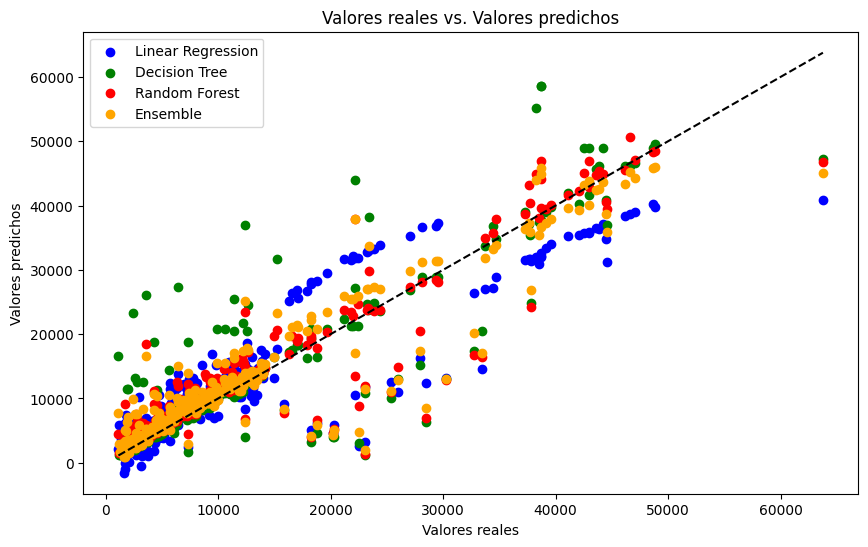

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(y_test, linear_pred, color='blue', label='Linear Regression')
plt.scatter(y_test, tree_pred, color='green', label='Decision Tree')
plt.scatter(y_test, forest_pred, color='red', label='Random Forest')
plt.scatter(y_test, ensemble_pred, color='orange', label='Ensemble')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')

plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs. Valores predichos')
plt.legend()

plt.show()


Este gráfico, nos ayuda a visualizar cómo se comparan las predicciones de los modelos con los valores reales del costo del seguro médico.

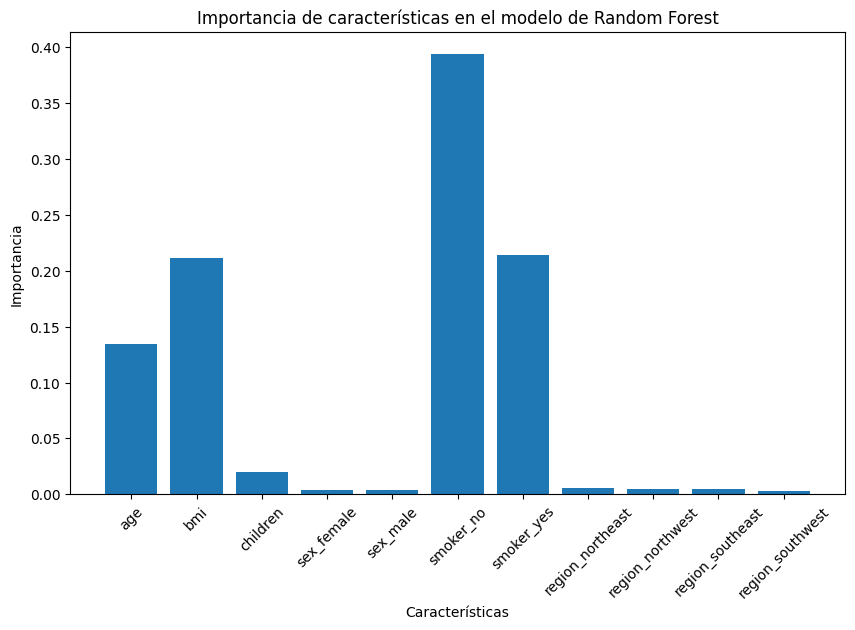

In [ ]:
importances = forest_model.feature_importances_
features = encoded_data.drop('charges', axis=1).columns

plt.figure(figsize=(10, 6))
plt.bar(features, importances)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de características en el modelo de Random Forest')
plt.xticks(rotation=45)
plt.show()


El siguiente gráfico, nos ayuda a visualizar qué características tienen más peso en la predicción del costo del seguro médico según el modelo de Random Forest.Observamos que las características que más peso tienen son las personas fumadoras.


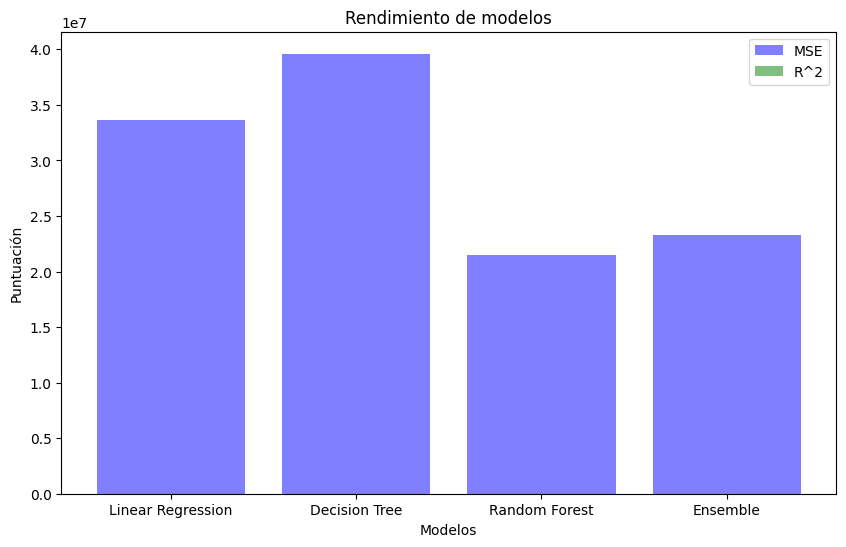

In [ ]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Ensemble']
mse_scores = [linear_mse, tree_mse, forest_mse, ensemble_mse]
r2_scores = [linear_r2, tree_r2, forest_r2, ensemble_r2]

plt.figure(figsize=(10, 6))
plt.bar(models, mse_scores, color='blue', alpha=0.5, label='MSE')
plt.bar(models, r2_scores, color='green', alpha=0.5, label='R^2')
plt.xlabel('Modelos')
plt.ylabel('Puntuación')
plt.title('Rendimiento de modelos')
plt.legend()
plt.show()


# Conclusiones

Basándonos en los resultados obtenidos de los modelos de regresión y el ensemble, así como en las métricas de evaluación, podemos sacar varias conclusiones:

**Selección del mejor modelo**: El modelo de Random Forest mostró el mejor rendimiento en términos de MSE y R^2 en comparación con los otros modelos de regresión individual y el ensemble. Esto sugiere que Random Forest es el modelo más adecuado para predecir el costo del seguro médico en este conjunto de datos.

**Importancia de las características**: Mediante la visualización de la importancia de las características en el modelo de Random Forest, podemos identificar qué características tienen más peso en la predicción del costo del seguro médico. Esto puede proporcionar información valiosa sobre qué factores tienen el mayor impacto en el costo del seguro.

**Rendimiento del ensemble:** El ensemble de modelos combinados mediante un promedio ponderado también mostró un buen rendimiento, con un MSE y un R^2 similares al modelo de Random Forest. Esto sugiere que combinar diferentes modelos puede mejorar la precisión de las predicciones y reducir el riesgo de sobreajuste.

**Limitaciones y áreas de mejora**: Aunque los modelos de regresión y el ensemble mostraron un buen rendimiento en general, aún puede haber margen para mejorar. Por ejemplo, podríamos explorar otras técnicas de preprocesamiento de datos, ajustar los hiperparámetros de los modelos o probar modelos más complejos para ver si podemos mejorar aún más la precisión de las predicciones.

En resumen, podemos concluir que el modelo de Random Forest es el más adecuado para predecir el costo del seguro médico en este conjunto de datos, y combinar diferentes modelos mediante un ensemble también puede ser beneficioso. Además, identificar las características más importantes puede proporcionar información útil para comprender los factores que influyen en el costo del seguro médico.